In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import GetOldTweets3 as got
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
nltk.download('vader_lexicon')
sns.set_style("darkgrid")
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RWM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Different functions we will be using

In [103]:
# Function to scrape for tweets, inputting the string and number of tweets in question

def get_tweets(word, number_of_tweets):
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(word)\
                                               .setSince("2020-05-01")\
                                               .setUntil("2020-05-12")\
                                               .setMaxTweets(number_of_tweets)
    
    # List of objects gets stores in "tweets" variable
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    # Iterating through tweets list. Stoing them temporarily in tweet variable
    # Get text and store it as a list inside "text_tweets"
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [104]:
# Function to tokenize words (Removing punctuation, removing stop words, putting lowercase)

def tokenize(text):   
    a = ""
    for word in text:
        a += word
    nopuncc = [char.lower() for char in a if char not in string.punctuation]
    word_list = word_tokenize("".join(nopuncc), "english")
    final_words = [word for word in word_list if word not in stopwords.words("english")]
    return final_words

In [ ]:
# Function to clean the given text without tokenizing it

def clean_text(text):
    
    # Converting to lowercase
    lower_case = text.lower()

    # Removing punctuation
    cleaned_text = lower_case.translate(str.maketrans("","", string.punctuation))
    
    # Removing stopwords
    stop_text = [word for word in cleaned_text.split() if word not in stopwords.words("english")]
    
    final_text = ""
    for word in stop_text:
        final_text = final_text + " " + word
    return final_text

In [105]:
# Function to generate text from tweets

def get_text_from_tweet(name, number_of_tweets):
    
    text = ""
    text_tweets = get_tweets(name, number_of_tweets)
    length = len(text_tweets)

    for i in range(0,length):
        text = text_tweets[i][0] + " " + text
    return text

In [106]:
# Function to generate cleaned text from tweets

def get_clean_text_from_tweet(name, number_of_tweets):
    
    text = ""
    text_tweets = get_tweets(name, number_of_tweets)
    length = len(text_tweets)

    for i in range(0,length):
        text = text_tweets[i][0] + " " + text
    
    return clean_text(text)

In [108]:
# Function to build sentiment analysis using NLTK

def sentiment_analyse(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    neg = score["neg"]
    pos = score["pos"]
    
    print(score)
    
    if neg > pos:
        print("\nWe have an overall Negative sentiment")
    elif neg < pos:
        print("\nWe have an overall Positive sentiment")
    else:
        print("\nWe have an overall Neutral sentiment")

In [109]:
sentiment_analyse(get_clean_text_from_tweet("Donald Trump", 1000))

{'neg': 0.204, 'neu': 0.636, 'pos': 0.16, 'compound': -1.0}

We have an overall Negative sentiment


In [159]:
# Function to track the emotions and build a corresponding barplot

def emotion_tracker(text):
    
    emotion_list = []

    with open("emotions.txt", "r") as file:
        for line in file:
            clear_line = line.replace("\n", "").replace(",", "").replace("'", "").strip()
            word, emotion = clear_line.split(":")

            if word in final_words:
                emotion_list.append(emotion)
                
    w = Counter(emotion_list)
    print(w)
    
    # Build a barplot showing these emotions
    
    fig,ax1 = plt.subplots()
    ax1.bar(w.keys(), w.values())
    
    # Automatically formats it properly
    fig.autofmt_xdate()

    #plt.savefig("graph.png")

### Now we build the script which will use the above functions to:
1) Tokenize / Clean the text from the "read.txt" file

2) Extract and count the emotions

3) Build a bar chart around those emotions

4) Perform overall NLTK sentiment analysis

Counter({' sad': 4, ' happy': 2, ' attached': 1, ' fearful': 1, ' loved': 1})
{'neg': 0.155, 'neu': 0.71, 'pos': 0.135, 'compound': -0.7844}

We have an overall Negative sentiment


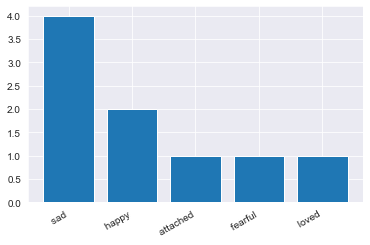

In [160]:
text = open("read.txt", encoding = "utf-8").read()
final_words = tokenize(text)
emotion_tracker(final_words)
sentiment_analyse(text)

### Same but for twitter analysis

Counter({' fearful': 9, ' sad': 6, ' powerless': 5, ' attracted': 4, ' happy': 4, ' entitled': 3, ' hated': 3, ' esteemed': 3, ' singled out': 2, ' angry': 2, ' cheated': 2, ' embarrassed': 2, ' attached': 2, ' adequate': 2, ' independent': 2, ' safe': 1, ' fearless': 1, ' average': 1, ' free': 1, ' codependent': 1, ' apathetic': 1, ' lost': 1, ' surprise': 1, ' focused': 1, ' loved': 1})
{'neg': 0.204, 'neu': 0.635, 'pos': 0.16, 'compound': -1.0}

We have an overall Negative sentiment


<Figure size 720x432 with 0 Axes>

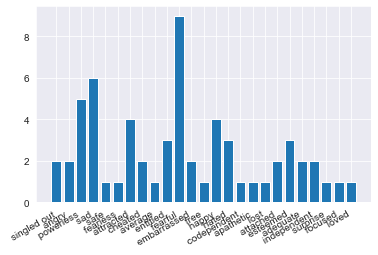

In [162]:
# Can change dates of tweets to scrape from in initial "get_tweets" function

text = get_clean_text_from_tweet("Donald Trump", 1000)
final_words = tokenize(text)
emotion_tracker(final_words)
sentiment_analyse(text)